In [1]:
#Importar en csv Test 2%
import pandas as pd
data_test=pd.read_csv('DataTest2%.csv')

In [2]:
coautores=[]
#########################
coautor=data_test.Coautor
#########################
coautor.reset_index(drop=True, inplace=True)
for r in coautor:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(int(sep[i][2:-2]))
        else:
            aux.append(int(sep[i][2:-1]))
    coautores.append(aux)

In [3]:
len(coautores)

3151

In [27]:
#Leer los abstracts del data test
#abstract
ab=[]
############################
abstract=data_test.Abstract
############################
abstract.reset_index(drop=True, inplace=True)

for r in abstract:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    ab.append(aux)
len(ab)

3151

In [28]:
ab[0]

['fluctuations',
 'glacier',
 'mass',
 'volume',
 'indicative',
 'changes',
 'climate',
 'system',
 'also',
 'strongly',
 'affect',
 'regional',
 'climate',
 'hydrology',
 'explore',
 'possible',
 'relationships',
 'radial',
 'growth',
 'schrenk',
 'spruce',
 'picea',
 'schrenkiana',
 'fisch',
 'et',
 'mey',
 'mass',
 'balance',
 'tsentralniy',
 'tuyuksuyskiy',
 'ts',
 'tuyuksuyskiy',
 'glacier',
 'located',
 'northern',
 'slopes',
 'tianshan',
 'mountains',
 'arid',
 'central',
 'asia',
 'attempt',
 'reconstruct',
 'historical',
 'mass',
 'balance',
 'variability',
 'ts',
 'tuyuksuyskiy',
 'glacier',
 'using',
 'tree-ring',
 'widths',
 'stable',
 'carbon',
 'isotope',
 'chronologies',
 'reconstruction',
 'able',
 'explain',
 '62.1',
 'variance',
 'annual',
 'glacier',
 'mass',
 'balance',
 'record',
 '1965–2014',
 'calibration',
 'period',
 'also',
 'analyzed',
 'centennial',
 'mass',
 'balance',
 'variability',
 'linkages',
 'climate',
 'change',
 'ts.tuyuksuyskiy',
 'glacier',
 'neg

In [5]:
#Lemmatize Stemming
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [29]:
data_preprocess_1=[]
data_preprocess_2=[]

for line in ab:
    #word_tokens = word_tokenize(tittle)
    data=[lemmatizer.lemmatize(t) for t in line]
    data_preprocess_1.append(data)
    
for line in data_preprocess_1:
    data=[stemmer.stem(t) for t in line]
    data_preprocess_2.append(data)

In [30]:
len(data_preprocess_2)

3151

In [31]:
data_preprocess_2[0]

['fluctuat',
 'glacier',
 'mass',
 'volum',
 'indic',
 'chang',
 'climat',
 'system',
 'also',
 'strong',
 'affect',
 'region',
 'climat',
 'hydrolog',
 'explor',
 'possibl',
 'relationship',
 'radial',
 'growth',
 'schrenk',
 'spruce',
 'picea',
 'schrenkiana',
 'fisch',
 'et',
 'mey',
 'mass',
 'balanc',
 'tsentralniy',
 'tuyuksuyskiy',
 't',
 'tuyuksuyskiy',
 'glacier',
 'locat',
 'northern',
 'slope',
 'tianshan',
 'mountain',
 'arid',
 'central',
 'asia',
 'attempt',
 'reconstruct',
 'histor',
 'mass',
 'balanc',
 'variabl',
 't',
 'tuyuksuyskiy',
 'glacier',
 'use',
 'tree-r',
 'width',
 'stabl',
 'carbon',
 'isotop',
 'chronolog',
 'reconstruct',
 'abl',
 'explain',
 '62.1',
 'varianc',
 'annual',
 'glacier',
 'mass',
 'balanc',
 'record',
 '1965–2014',
 'calibr',
 'period',
 'also',
 'analyz',
 'centenni',
 'mass',
 'balanc',
 'variabl',
 'linkag',
 'climat',
 'chang',
 'ts.tuyuksuyskiy',
 'glacier',
 'negat',
 'annual',
 'mass',
 'balanc',
 'year',
 'sinc',
 '1968',
 'undergon

In [32]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
dictionary = gensim.corpora.Dictionary(data_preprocess_2)
#dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_preprocess_2]

In [33]:
lda_model_abs =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [34]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_abs, texts=data_preprocess_2, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4002628034968166


In [35]:
lda_model_abs.print_topics()

[(0,
  '0.012*"studi" + 0.008*"use" + 0.007*"group" + 0.006*"result" + 0.006*"2018" + 0.006*"treatment" + 0.006*"effect" + 0.005*"method" + 0.005*"differ" + 0.005*"signific"'),
 (1,
  '0.018*"cell" + 0.010*"sigb" + 0.007*"rhodomyrton" + 0.007*"activ" + 0.007*"model" + 0.007*"studi" + 0.007*"result" + 0.007*"2018" + 0.006*"membran" + 0.006*"coal"'),
 (2,
  '0.009*"studi" + 0.008*"group" + 0.008*"use" + 0.008*"effect" + 0.006*"show" + 0.006*"2018" + 0.005*"fear" + 0.005*"result" + 0.005*"risk" + 0.004*"level"'),
 (3,
  '0.010*"use" + 0.007*"2018" + 0.006*"result" + 0.006*"system" + 0.005*"increas" + 0.005*"studi" + 0.005*"flow" + 0.005*"temperatur" + 0.005*"elsevi" + 0.005*"effect"'),
 (4,
  '0.007*"2018" + 0.007*"use" + 0.006*"elsevi" + 0.005*"s." + 0.005*"effect" + 0.005*"phase" + 0.005*"acid" + 0.005*"differ" + 0.004*"heat" + 0.004*"result"'),
 (5,
  '0.013*"use" + 0.008*"effect" + 0.007*"studi" + 0.006*"2018" + 0.006*"result" + 0.005*"age" + 0.005*"associ" + 0.005*"differ" + 0.005*"b

In [36]:
#Sacar los topics
prueba=[]
for r in data_preprocess_2:
    vector=dictionary.doc2bow(r)
    var=sorted(lda_model_abs[vector], key=lambda tup: -1*tup[1])
    resultado=lda_model_abs.print_topic(var[0][0])
    sep= resultado.split('"')
    #print (sep)
    #m= len(sep)
    aux=[]
    for i in range(0,8):
        if i%2==1:
            aux.append(sep[i])
    prueba.append(aux)

In [37]:
len (prueba)

3151

In [38]:
prueba[0]

['use', '2018', 'result', 'system']

In [39]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [40]:
abst=[]
for r in prueba:
    #print(r)
    aux=' '.join(r)
    abst.append(aux)
len(abst) 

3151

In [42]:
abst[1]

'model use develop system'

In [43]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
#Creación de grafo con peso de titulo
g_abs=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)

for node in autor:
    g_abs.add_node(node)

for edge in coautores:
    #counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in edge:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            if dist==0:
                dist==1
            else:
                dist=1/dist
            g_abs.add_edge(autor[ind], elem, weight=dist)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [44]:
print (nx.info(g_abs))

Name: 
Type: Graph
Number of nodes: 3151
Number of edges: 172
Average degree:   0.1092


3147.0
0.7445999999999999


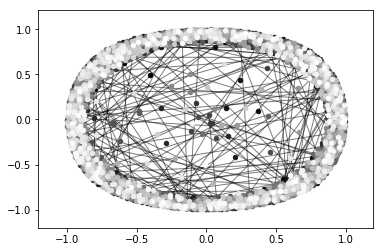

In [45]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_abs
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_tittle=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_tittle)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()